In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df = pd.read_csv("E:\ExcelR\Data Science\Datasets\Iris.csv",index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [8]:
x = df.iloc[:,:-1]
y = df['Species']

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
dt = DecisionTreeClassifier()

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Model Evaluation

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [13]:
confusion_matrix(ytest,ypred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [14]:
print('Training Accuracy: ', dt.score(xtrain,ytrain))    # help to understand the underfiiting and overfitting
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training Accuracy:  1.0
Testing Accuracy:  0.9666666666666667


In [15]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

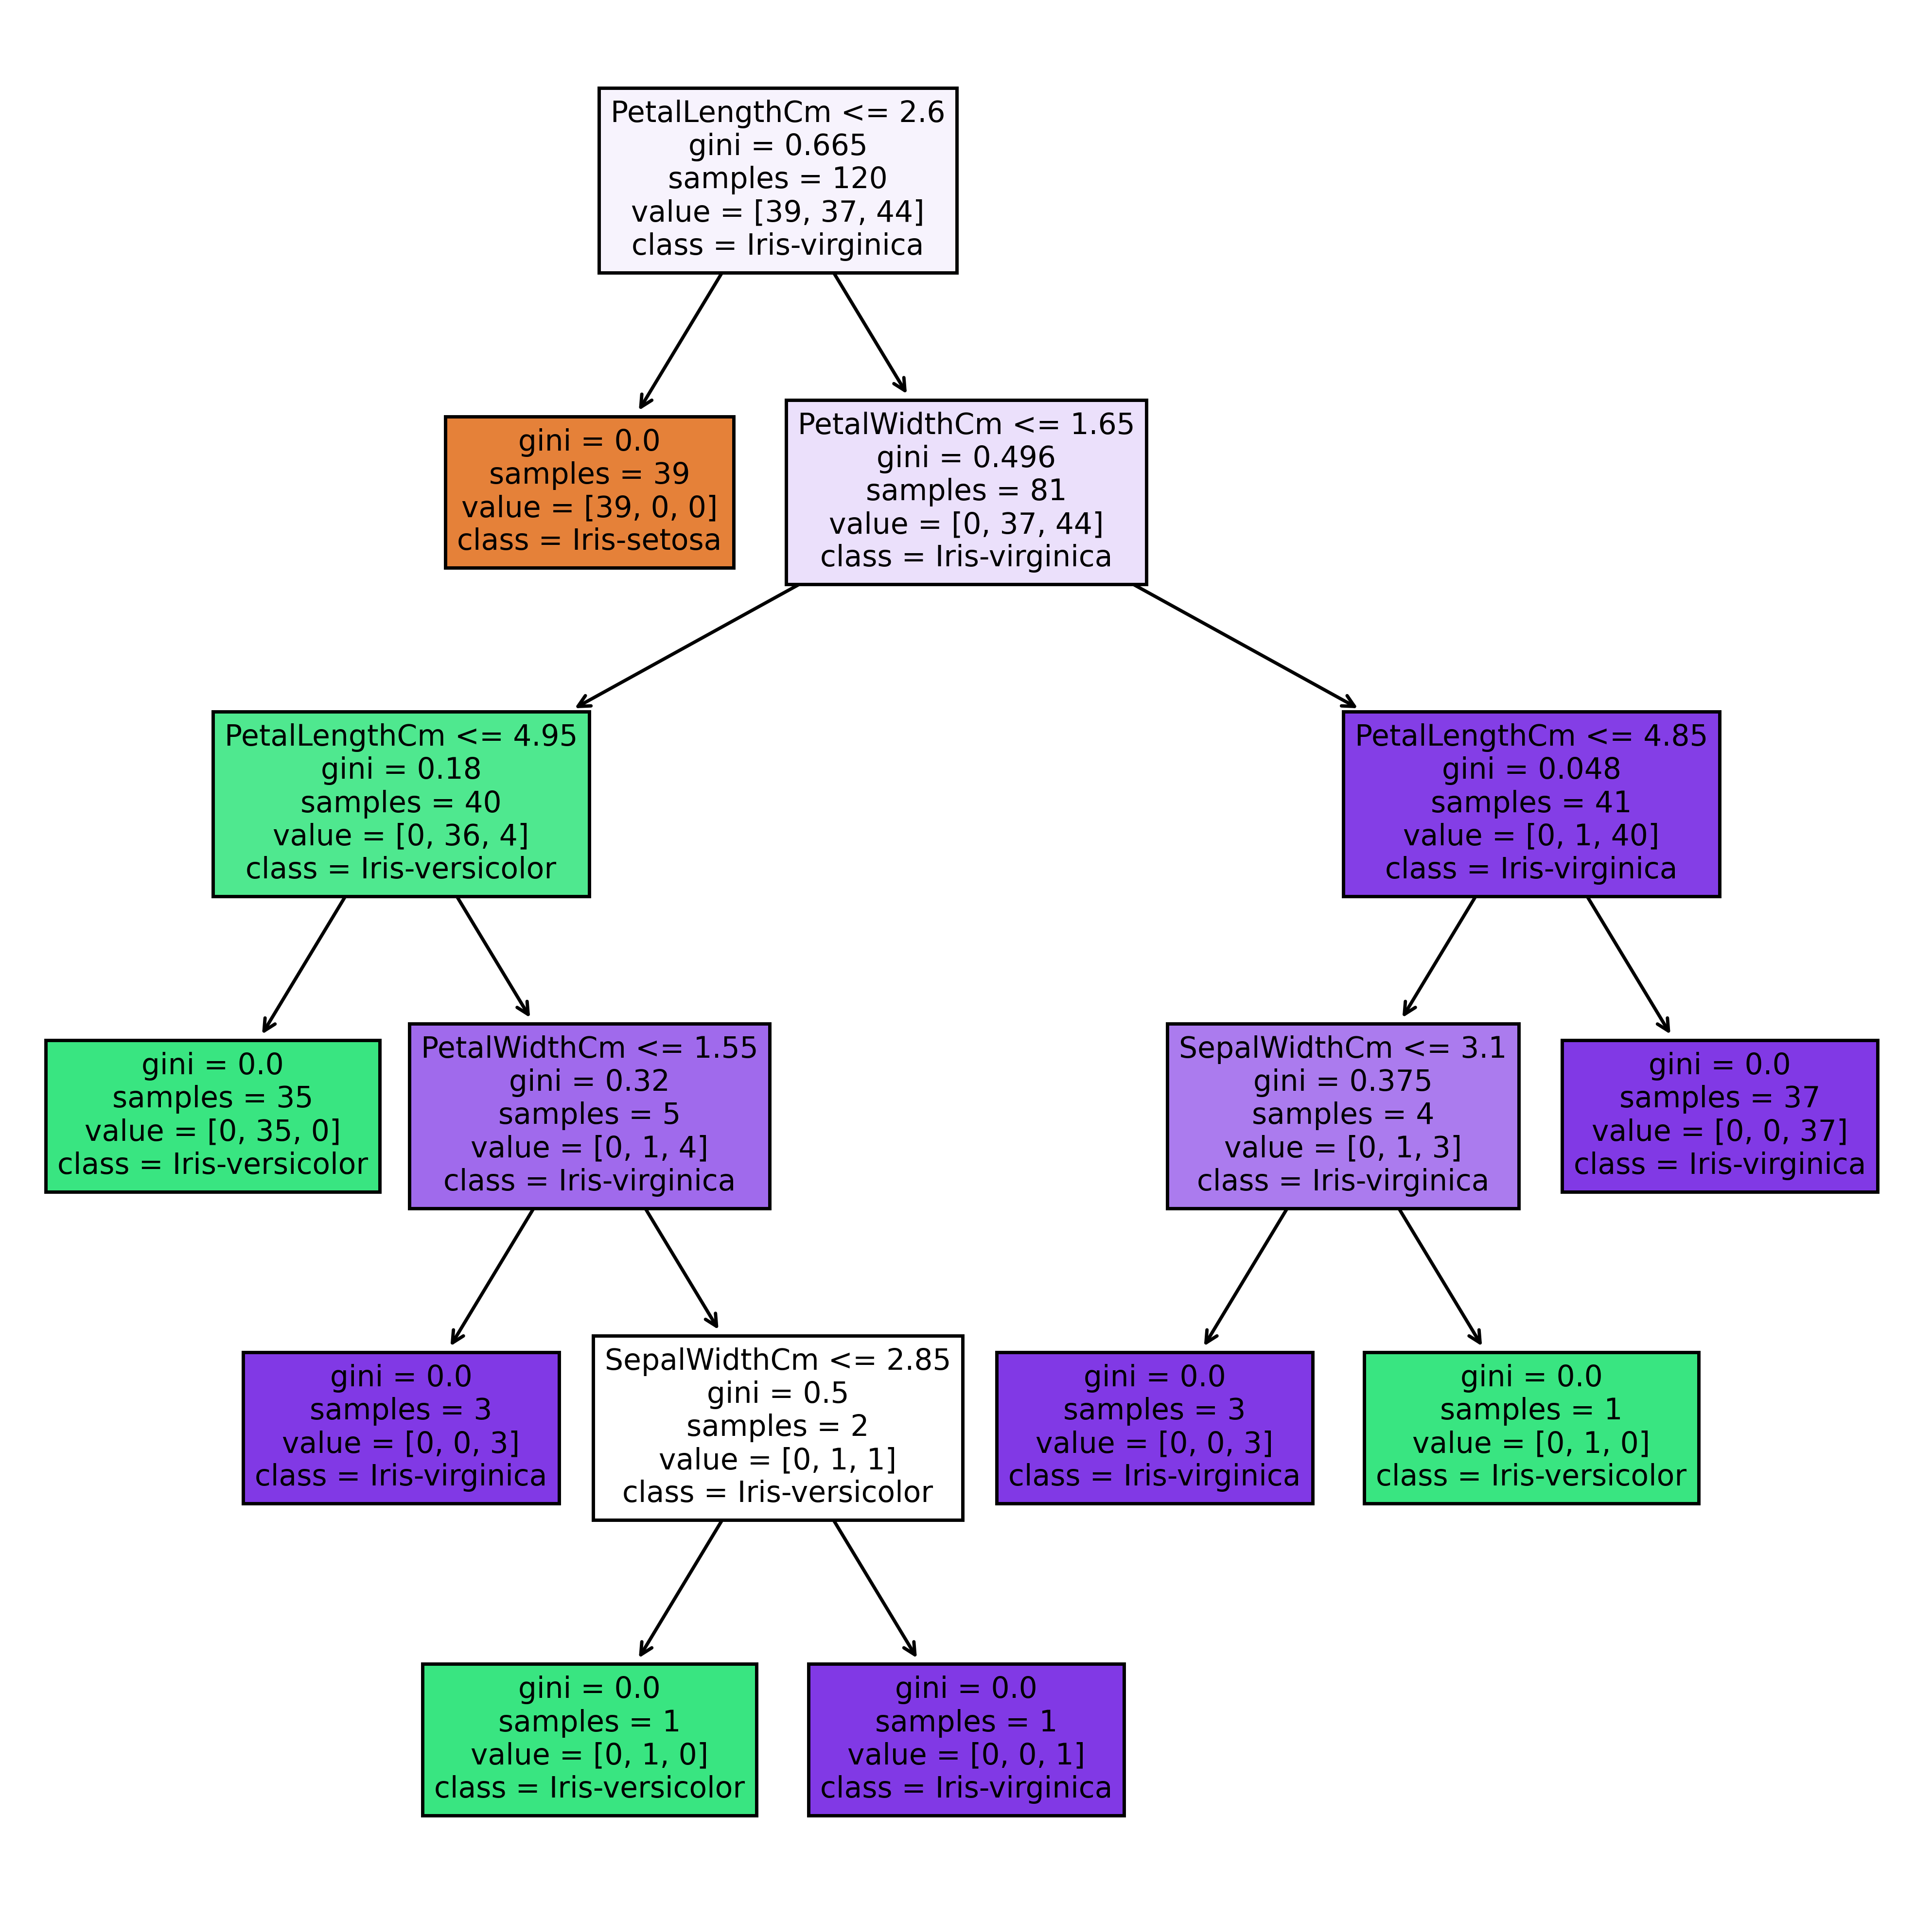

In [26]:
tree.plot_tree(dt, feature_names= list(x.columns),class_names=list(df['Species'].unique()),filled=True)
plt.show()

In [28]:
dt.feature_importances_    # will return information gain of all columns

array([0.        , 0.03133487, 0.57201197, 0.39665316])

# CART

In [30]:
dtc = DecisionTreeClassifier(criterion='gini')

In [33]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

In [34]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [35]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)

(1.0, 0.9666666666666667)

# Regression

In [36]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [37]:
x = df.iloc[:,:-2]
y = df['PetalWidthCm']

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dtr =DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
yp =dtr.predict(xtest)
yp

array([1.4, 0.4, 1.4, 1.4, 1.5, 0.2, 1. , 1.5, 1.4, 1. , 1.8, 0.2, 0.2,
       0.1, 0.4, 1.5, 1.8, 1.4, 1.5, 1.8, 0.5, 1.8, 0.2, 1.8, 2.2, 2.1,
       1.5, 2.3, 0.2, 0.2, 0.3, 0.2, 1.4, 0.2, 0.2, 1.5, 1.5, 0.2, 0.3,
       0.2, 1.9, 1.4, 1.4, 0.2, 0.2])

In [41]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(0.998523988291134, 0.8973750349064507)

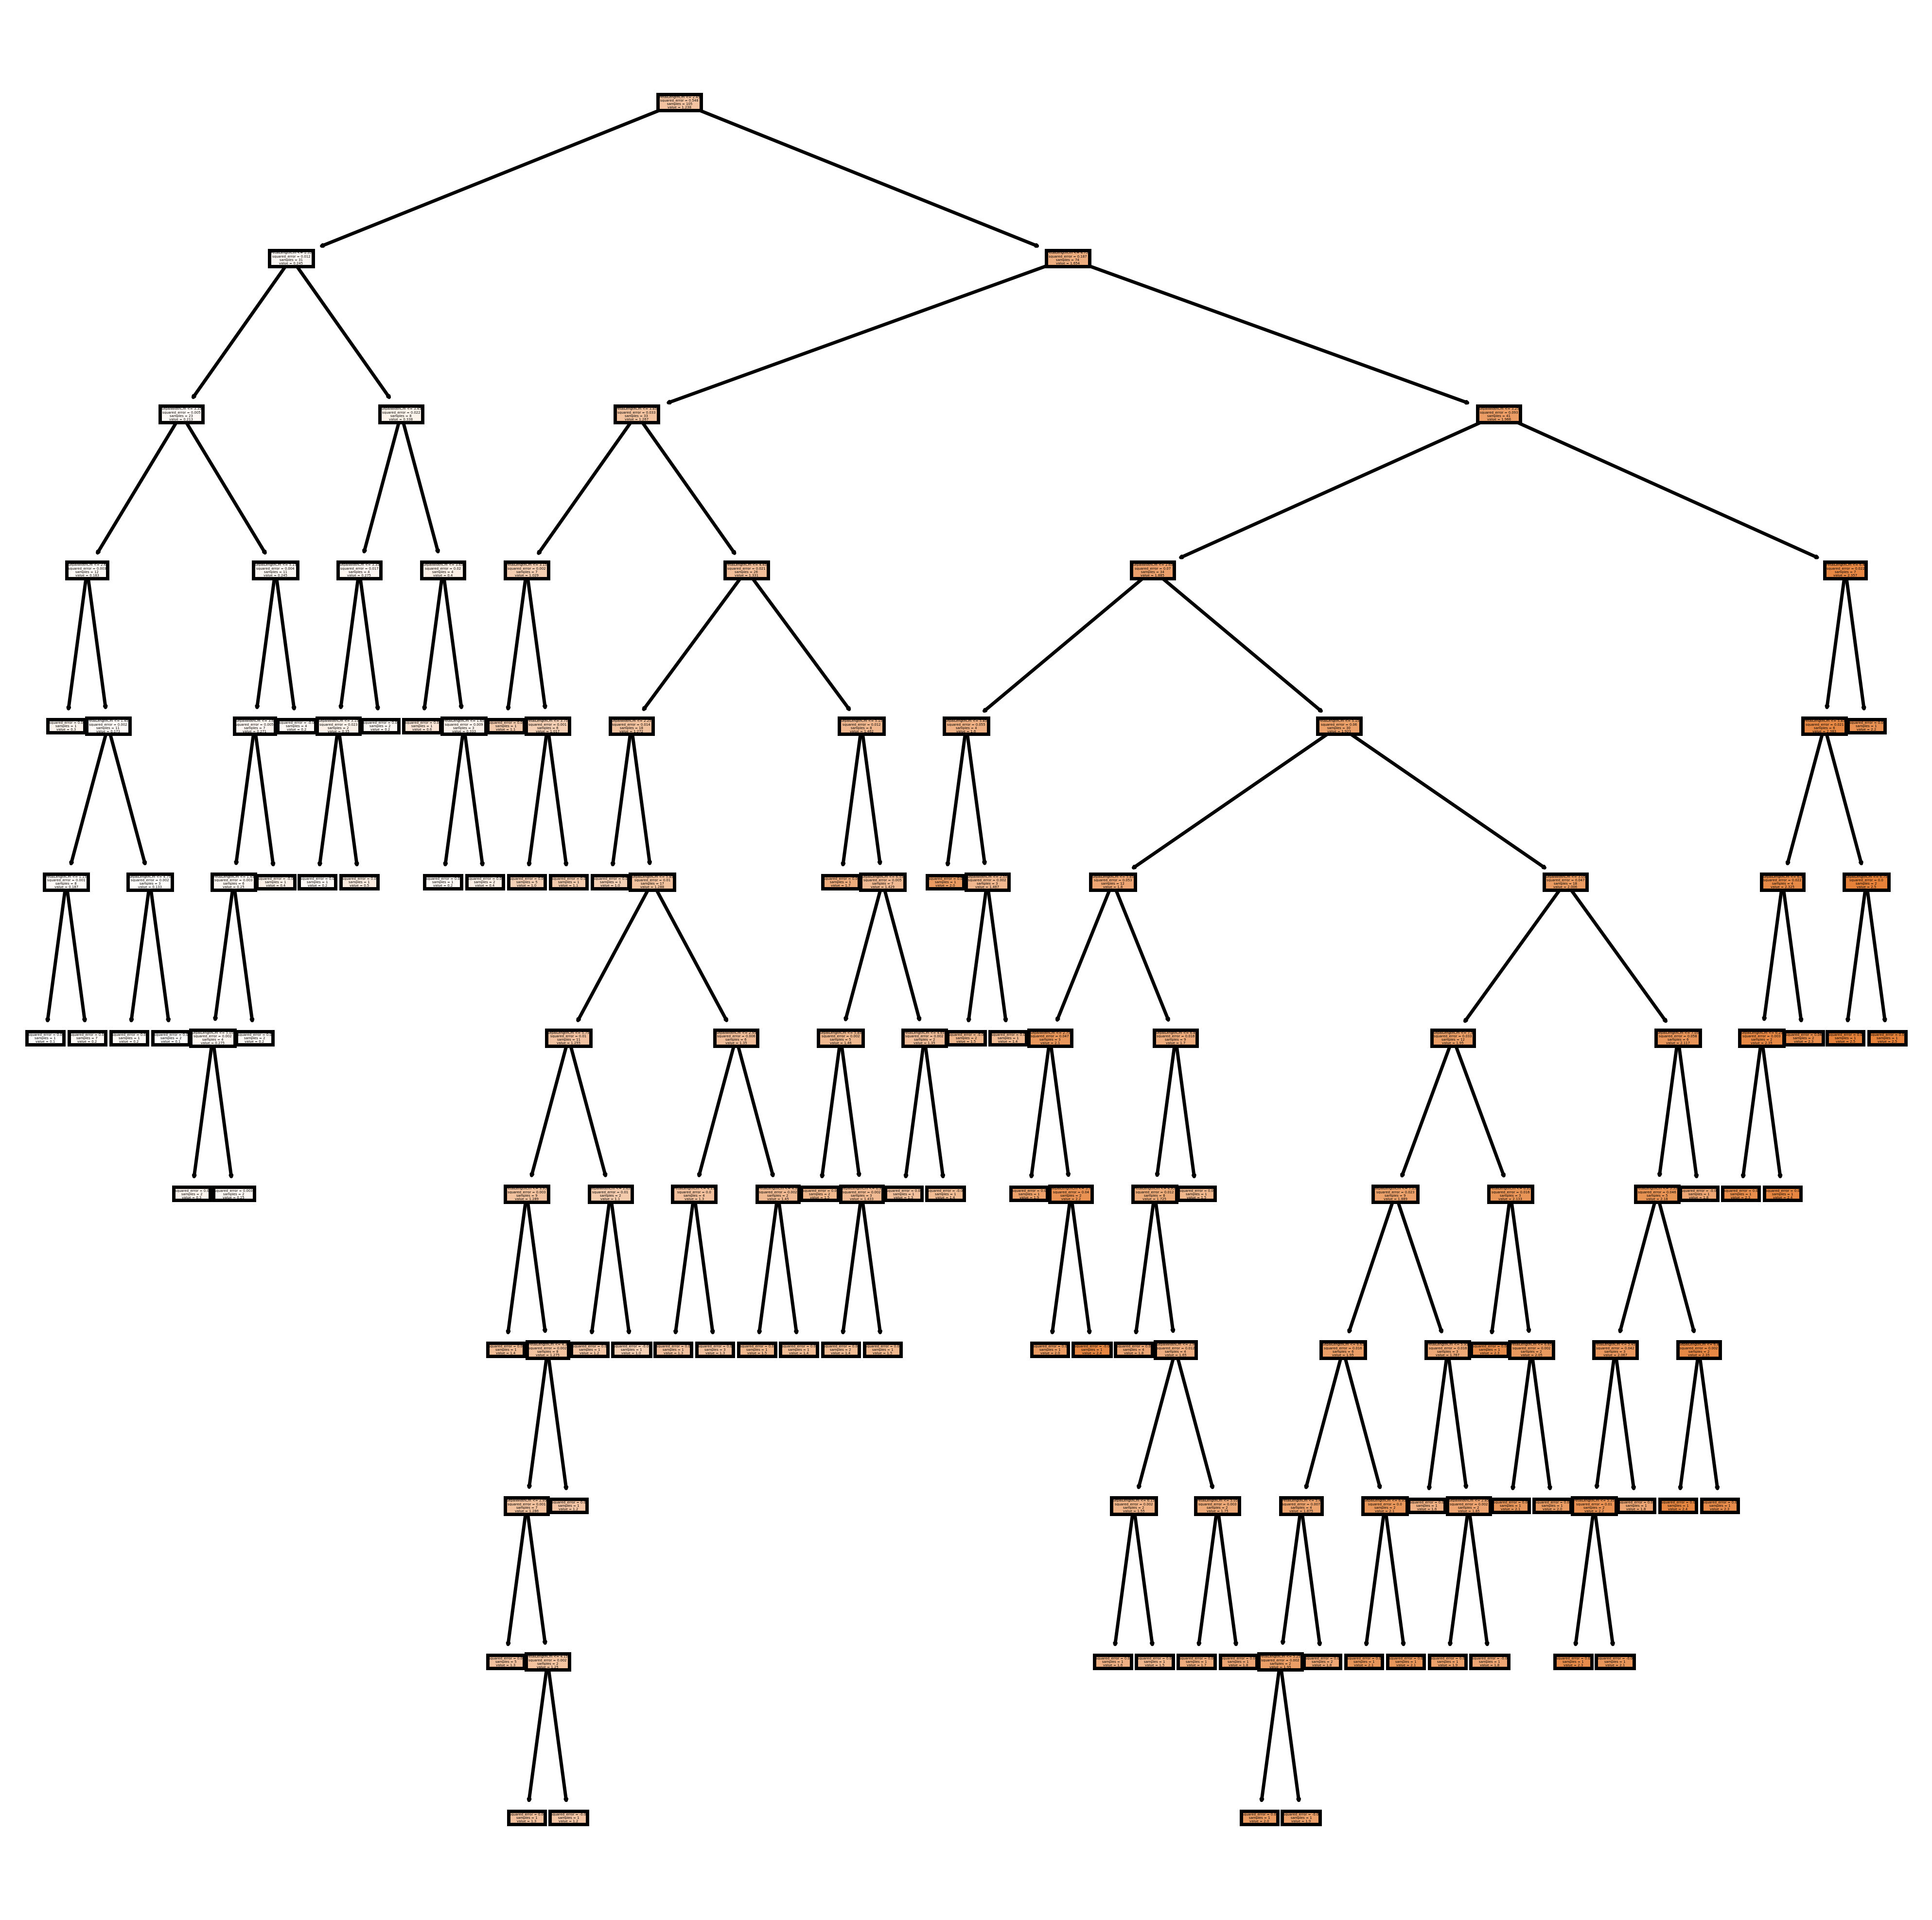

In [43]:
tree.plot_tree(dtr, feature_names=list(x.columns), filled=True)
plt.show()

# Hyperparameter Tunning

In [44]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [45]:
from sklearn.model_selection import GridSearchCV

In [48]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [49]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, verbose=1)

In [50]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [51]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'splitter': 'best'}

In [52]:
dtr = DecisionTreeRegressor(criterion='squared_error',max_depth=3,splitter='best')

In [53]:
dtr.fit(xtrain,ytrain)
ypred = dtr.predict(xtest)

In [54]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(0.9419858001628175, 0.9327669485234616)

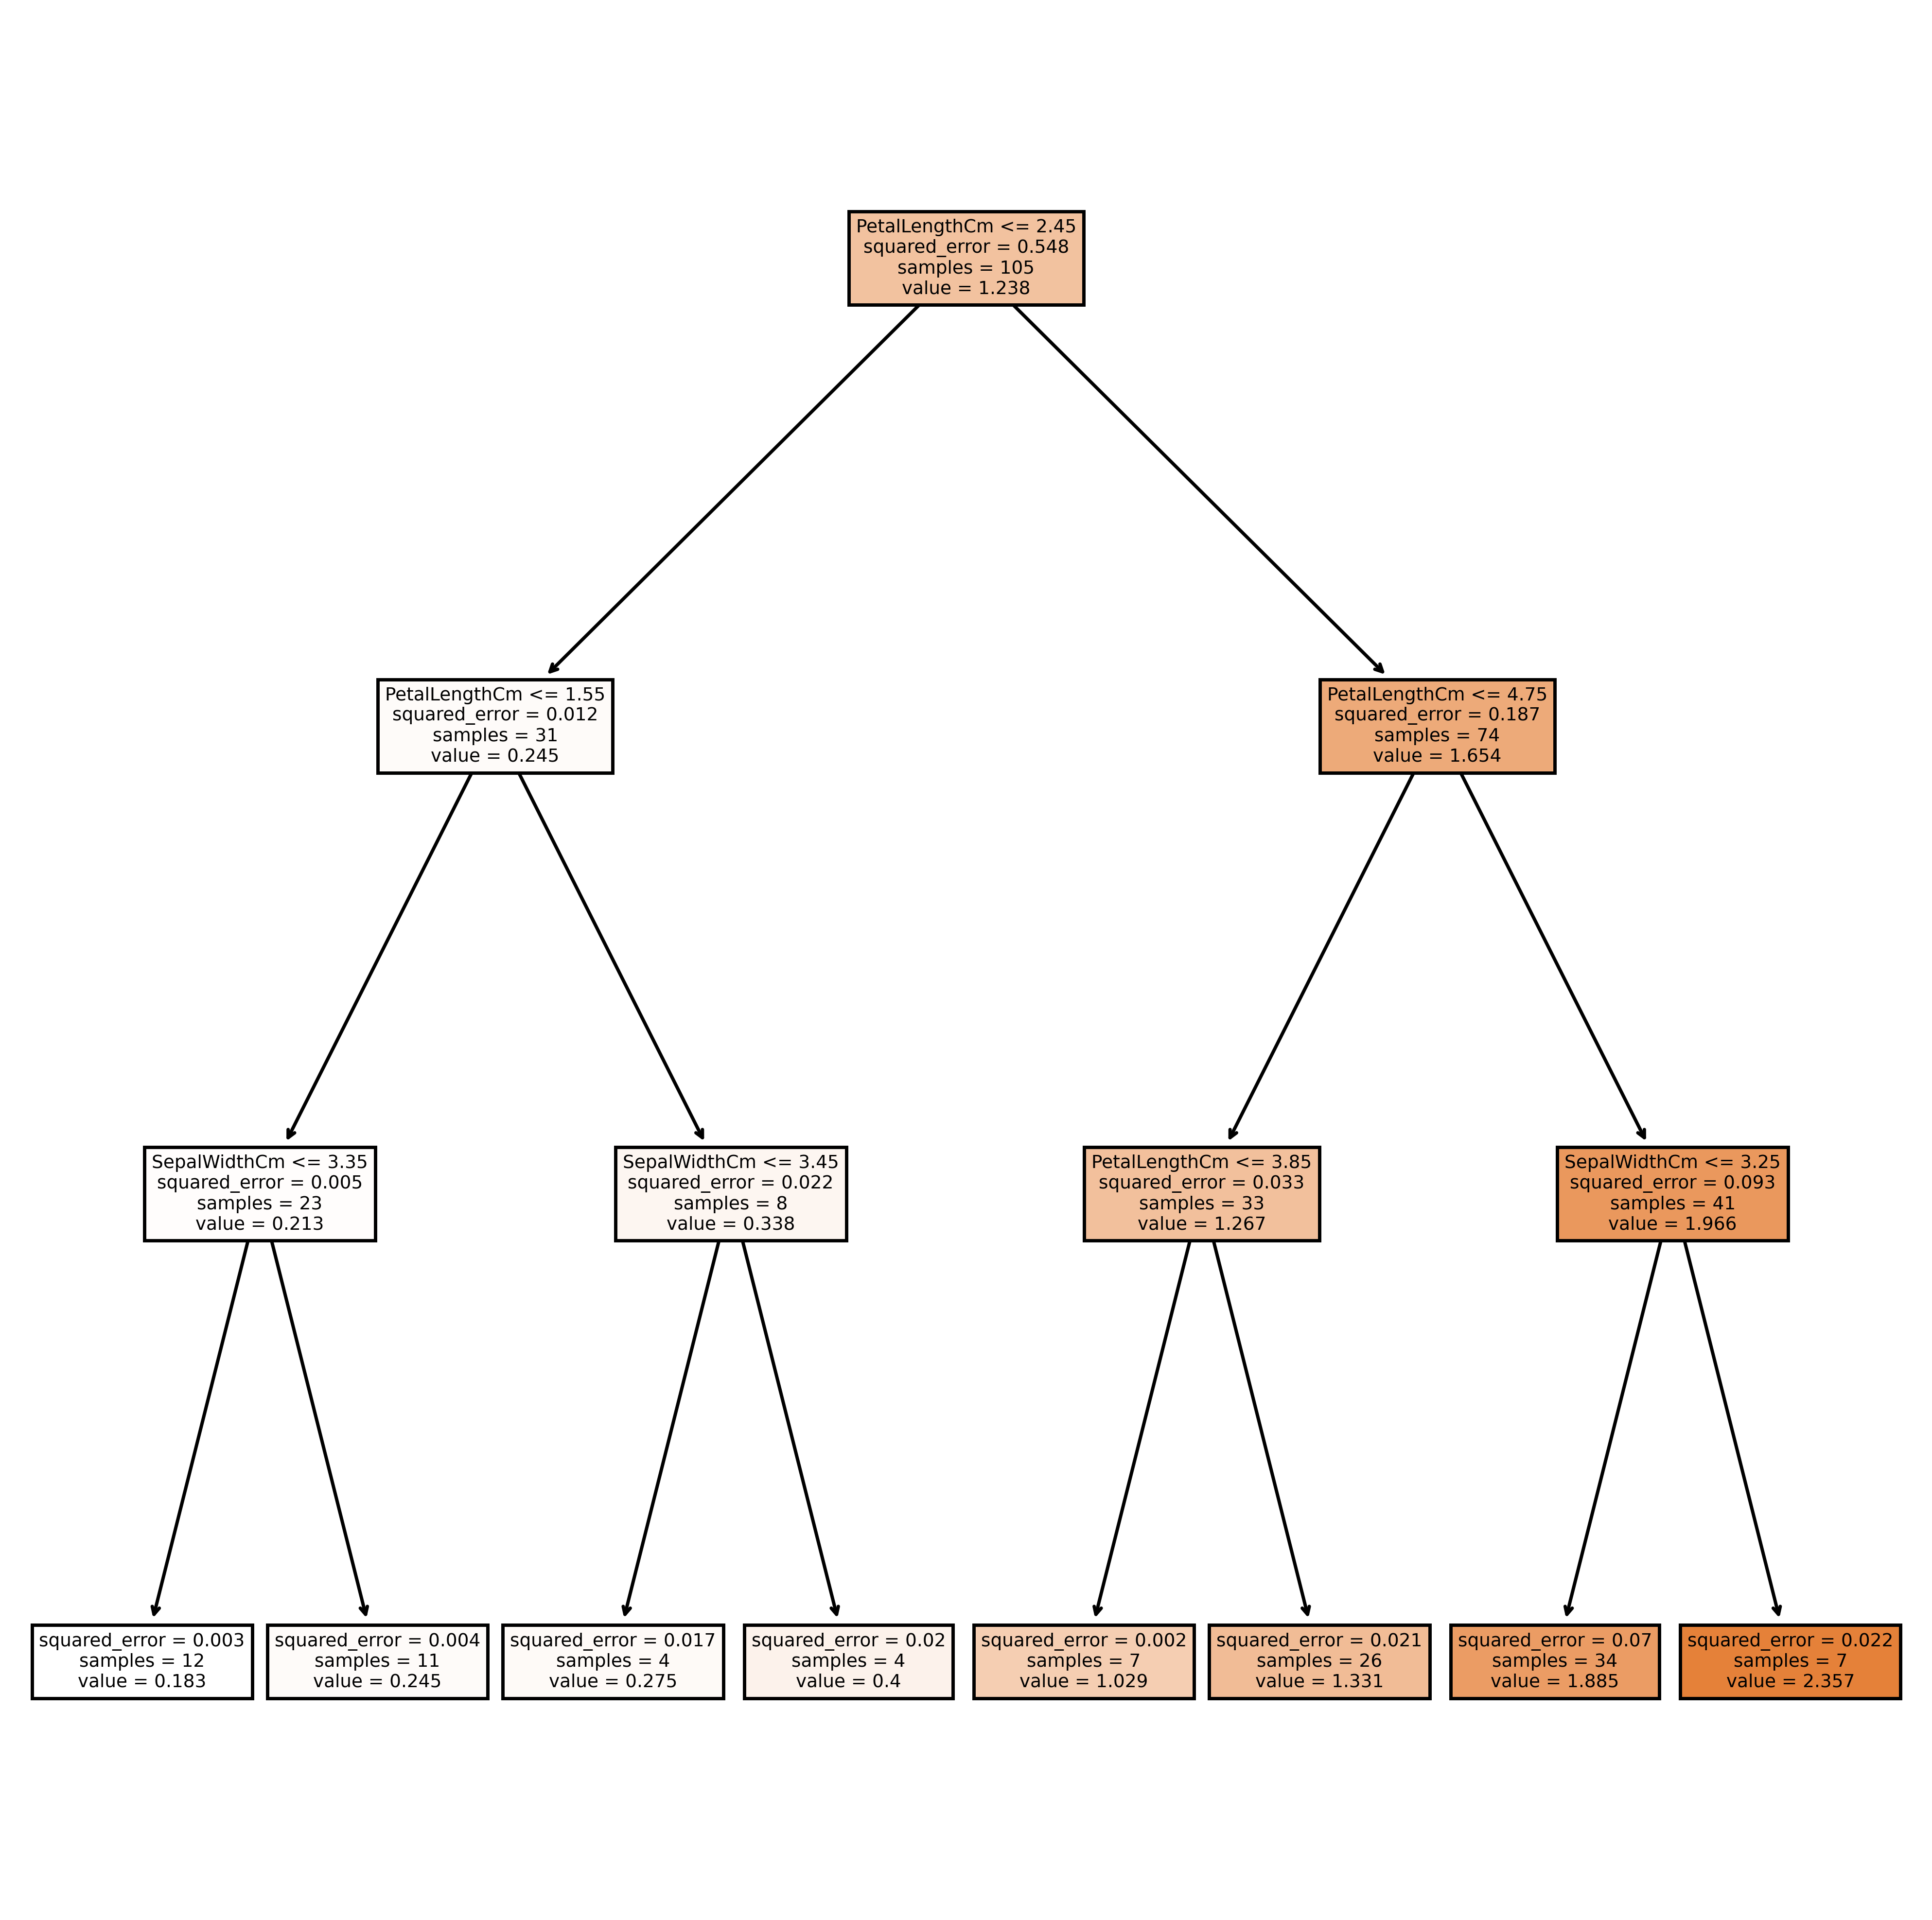

In [55]:
tree.plot_tree(dtr,feature_names=list(x.columns), filled=True)
plt.show()